# Problem 9

In [1]:
from sklearn import cluster, datasets, mixture
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt


In [2]:
X, y = datasets.make_moons(n_samples=100, noise=0.11)

# 9.A: Gaussian Parameters Estimation

In [3]:
class0_data = X[y == 0]
class1_data = X[y == 1]

In [4]:
class0_miu = class0_data.mean(axis=0)
class0_Sigma = np.cov(class0_data.T)

class1_miu = class1_data.mean(axis=0)
class1_Sigma = np.cov(class1_data.T)

In [5]:
def gaussian_prob(miu, Sigma, x):
    d = miu.shape[0]
    SigmaDet = np.linalg.det(Sigma)
    SigmaInv = np.linalg.inv(Sigma)
    partOne = 1/((SigmaDet**0.5) * (2*np.pi)**(d/2))
    partTwo = np.exp(-0.5*(x.T-miu).T.dot(SigmaInv).dot(x-miu))
    return partOne * partTwo

In [6]:
from matplotlib.patches import Ellipse

def plot_data(ax, X, y_pred, zorder):
    ax.scatter(X['red'], X['blue'], c=y_pred, zorder=2);
    ax.set_title('Distribution of mean R,B of images')
    ax.set_xlabel('red')
    ax.set_ylabel('blue') ##Chelsea

def plot_contour(ax, g_params):
    for xy, covariance, w in g_params:
        
        U, s, Vt = np.linalg.svd(covariance)        
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))    
        width, height = 2 * np.sqrt(s) 
        
        for nsig in range(1, 4):
            ax.add_patch(Ellipse(xy, nsig * width, nsig * height,
                                 angle, alpha= 0.1))
        
def plot_results(X, y_pred, g_params):
    
    fig, ax = plt.subplots(figsize=(10,8))
    ax.axis('equal')

    plot_data(ax, X, y_pred, zorder=2)
    plot_contour(ax, g_params)

In [7]:
class GMM:
    def __init__(self, num_components, iterations):
        self.k = num_components
        self.stop = iterations
    
    def init_params(self, X):
        num_features = X.shape[1]
        dim1_range = min(X[:,0]), max(X[:,0])
        
        self.alphas = np.ones(self.k) / self.k
#         self.mius = dim1_range + np.random.rand(self.k, num_features) * (dim1_range[1]-dim1_range[0])
        self.mius = np.random.randint(-5, 5, size=(self.k, num_features))
        self.covs = [np.identity(num_features) * 5 for i in range(self.k)]
        
        self.reg_cov = 1e-6*np.identity(2)

    
    def E_step(self, X):
        
        num_samples = len(X)
        self.ric = np.zeros((num_samples, self.k))
        
        for pic, muc, covc, r in zip(self.alphas, self.mius, self.covs, range(len(self.ric[0]))):
            covc += self.reg_cov
#             self.ric[:, r] = pic * gaussian_prob(muc, covc, X)
            mn = multivariate_normal(mean=muc, cov=covc)
            self.ric[:, r] = pic*mn.pdf(X)

        for r in range(len(self.ric)):
            self.ric[r, :] = self.ric[r, :] / np.sum(self.ric[r, :])

    def M_step(self, X):
        
        self.mc = np.sum(self.ric, axis=0)
        self.alphas = self.mc/np.sum(self.mc)
        self.mius = np.dot(self.ric.T, X) / self.mc.reshape(self.k, 1)

        self.covs = []

        for r in range(len(self.alphas)):
            covc = 1/self.mc[r] * (np.dot( (self.ric[:, r].reshape(len(X), 1)*(X-self.mius[r]) ).T, X - self.mius[r]))
            self.covs.append(covc)
        self.covs = np.asarray(self.covs)
            
    def fit(self, X):
        
        self.init_params(X)
        
        for iters in range(self.stop):
            self.E_step(X)
            self.M_step(X)
#     def 

In [64]:
X, y = datasets.make_moons(n_samples=200, noise=0.04)

from sklearn.datasets.samples_generator import make_blobs
from scipy.stats import multivariate_normal

# X,y = make_blobs(cluster_std=1.5,random_state=20,n_samples=500,centers=3)

# X = np.dot(X, np.random.RandomState(0).randn(2,2))


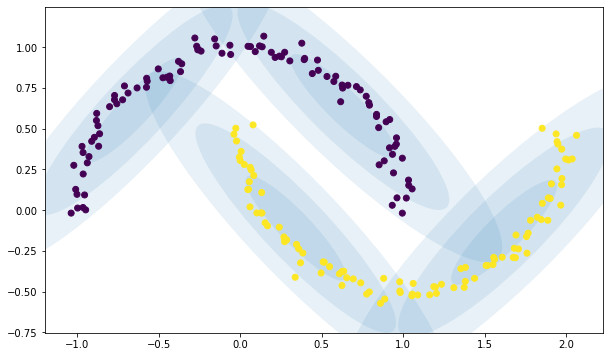

In [153]:
gmm = GMM(4, 60)
gmm.init_params(X)
gmm.fit(X)

g_params = zip(gmm.mius, gmm.covs, gmm.alphas)

fig, ax = plt.subplots(figsize=(10,6))
ax.axis('equal')


ax.scatter(X[:,0], X[:,1], c=y, zorder=2)
plot_contour(ax, g_params)

In [10]:
X

array([[ 1.5778114 , -0.22414939],
       [-0.17816009,  0.8607731 ],
       [-0.39306593,  0.78615749],
       [ 1.8601185 , -0.29304399],
       [ 0.54623664,  0.69327471],
       [ 0.09914355, -0.01295843],
       [ 1.83015043,  0.56284382],
       [ 0.87631311, -0.34464193],
       [ 0.93573818,  0.29734695],
       [ 1.10390462,  0.57108132],
       [-0.11781213,  0.27993979],
       [ 1.10692072, -0.47127035],
       [ 1.42593433, -0.27767055],
       [ 0.9634485 ,  0.13419341],
       [ 1.91120793,  0.33435262],
       [-0.14557847,  1.02006462],
       [-0.79406775,  0.62445315],
       [ 0.56523394, -0.40562805],
       [-0.03267159,  0.15400401],
       [ 0.01265791,  0.61113296],
       [ 0.06607051,  0.97497505],
       [ 0.68090341, -0.4626506 ],
       [ 0.01714764,  0.06218192],
       [-0.98115951,  0.00749135],
       [ 0.07014586,  1.02927385],
       [ 1.78678433, -0.12677078],
       [ 0.79190227,  0.60907327],
       [ 1.98402699,  0.31933602],
       [ 0.37234677,